Data saved to lab01_data.csv


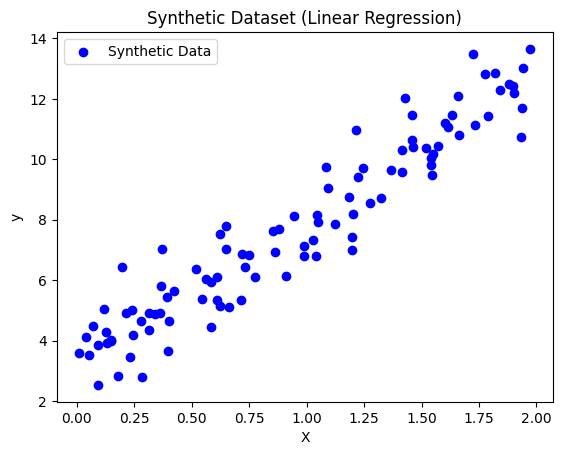

Optimal Theta: [3.18695551 4.79496004]


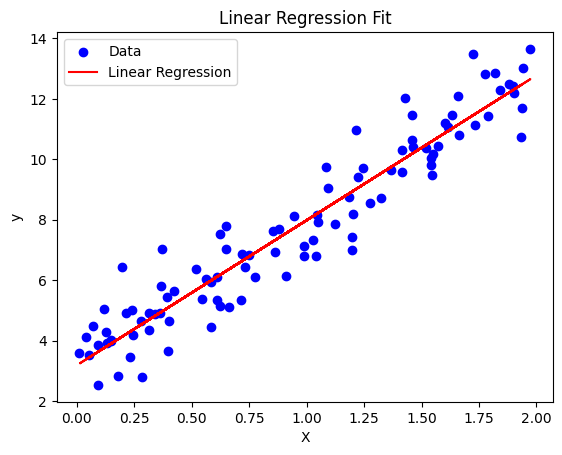

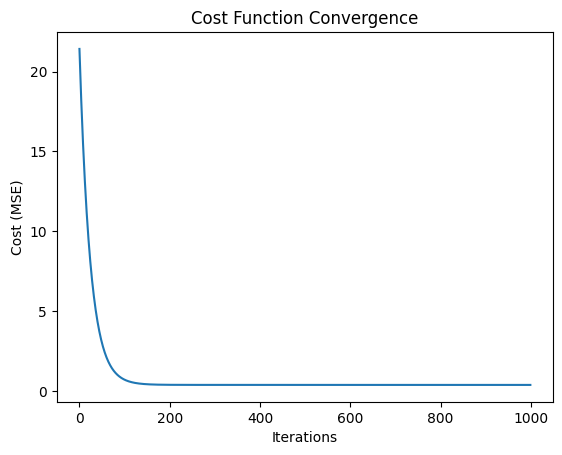

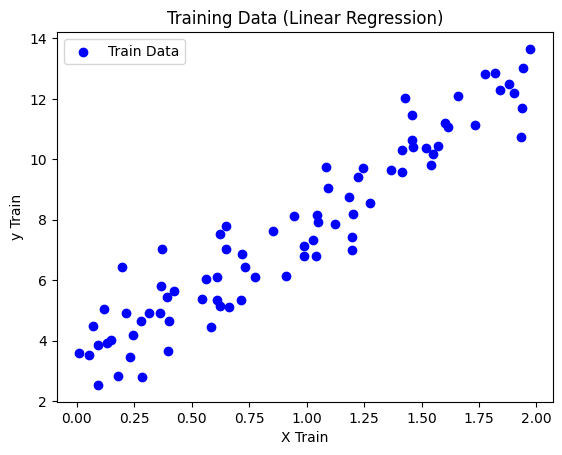

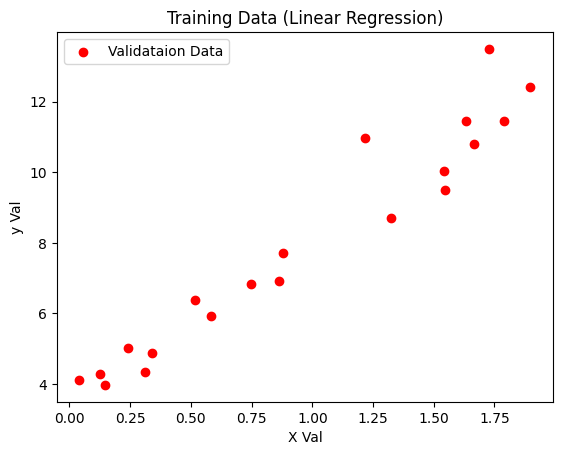

Training MSE: 0.4238
Validation MSE: 0.3264


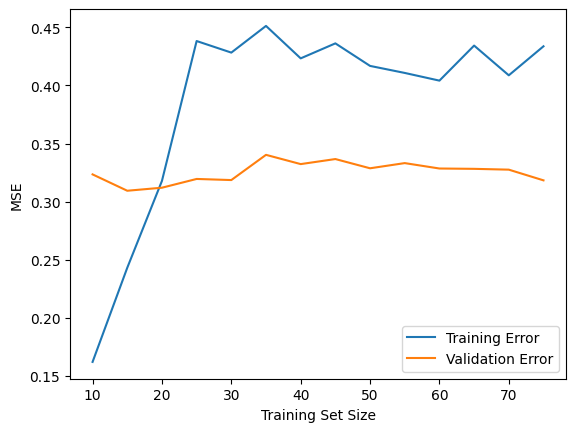

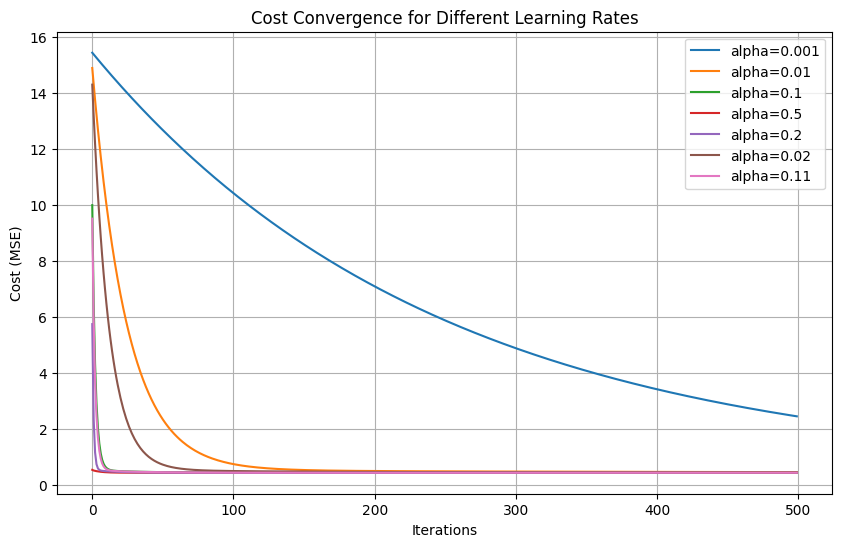

Validation MSE: 0.6366
Validation RMSE: 0.7978
Validation R² Score: 0.9306


In [1]:
import import_ipynb
import task1
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

In [2]:
X, y, df = task1.load_data("data_01.csv", "14.96", "463.26")


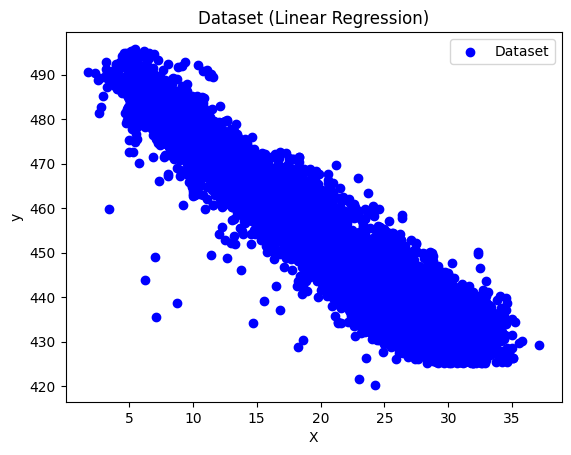

In [4]:
plt.scatter(X, y, color='blue', label='Dataset')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Dataset (Linear Regression)")
plt.legend()
plt.show()

In [4]:
X_b = task1.process_data(X)
theta_initial = np.random.randn(2, 1)
iterations = 15000
alpha = 0.001
thetaFinal, costHistory = task1.train(X_b, y, theta_initial, alpha, iterations)
while thetaFinal[1] > 0:
    thetaFinal, costHistory = task1.train(X_b, y, theta_initial, alpha, iterations)
print(thetaFinal)

[[485.52632198]
 [ -1.6592068 ]]


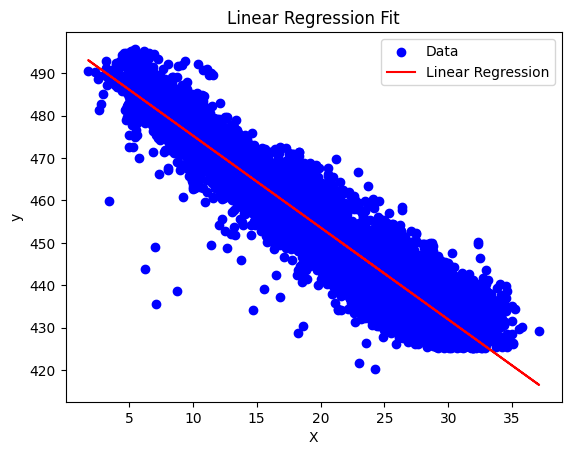

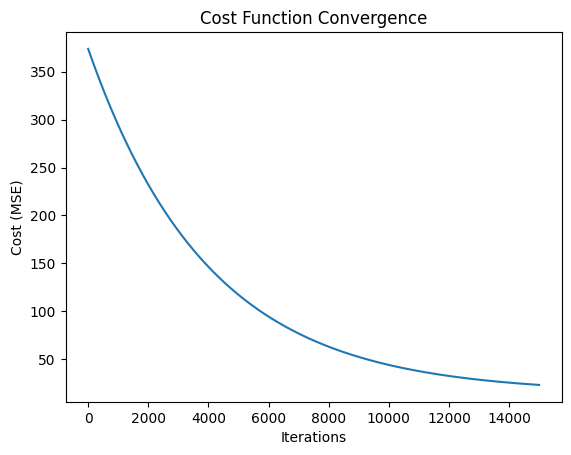

In [5]:
thetaFinal = np.array([ [497.03447891], [-2.17133136]])
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, X_b.dot(thetaFinal), color='red', label='Linear Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

plt.plot(range(iterations), costHistory)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_b = task1.process_data(X_train)
X_val_b = task1.process_data(X_val)
thetaFinal, costHistory = task1.train(X_train_b, y_train, theta_initial, alpha, iterations)

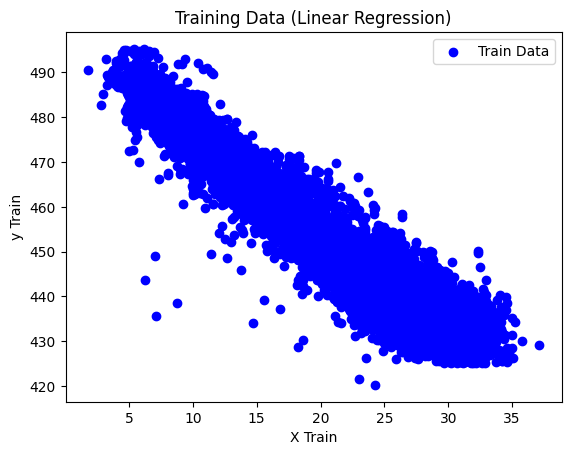

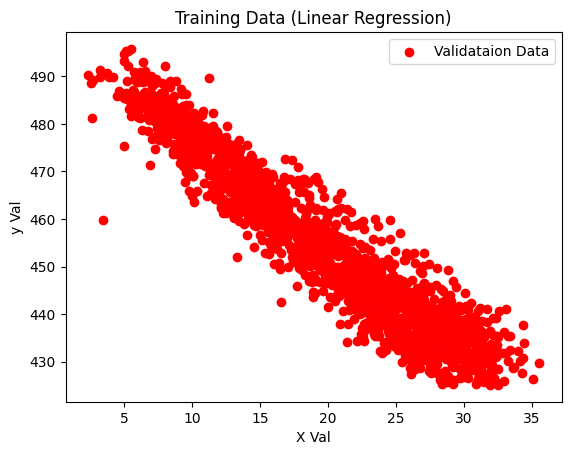

In [9]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.xlabel("X Train")
plt.ylabel("y Train")
plt.title("Training Data (Linear Regression)")
plt.legend()
plt.show()
plt.scatter(X_val, y_val, color='red', label="Validataion Data")
plt.xlabel("X Val")
plt.ylabel("y Val")
plt.title("Training Data (Linear Regression)")
plt.legend()
plt.show()

In [10]:
trainMse = task1.compute_cost(X_train_b, y_train, thetaFinal)
print(f"Training MSE: {trainMse:.4f}")

Training MSE: 14.9863


In [11]:
valMse = task1.compute_cost(X_val_b, y_val, thetaFinal)
print(f"Validation MSE: {valMse:.4f}")

Validation MSE: 14.6664


In [ ]:
trainErrors, valErrors = [], []
mR = range(10, len(X_train), 5)
for m in mR:
    theta, _ = task1qgradient_descent(X_train_b[:m], y_train[:m], thetaFinal, alpha, 100)
    trainErrors.append(compute_cost(X_train_b[:m], y_train[:m], theta))
    valErrors.append(compute_cost(X_val_b, y_val, theta))

plt.plot(mR, trainErrors, label="Training Error")
plt.plot(mR, valErrors, label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.show()